In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [32]:
# Toy data 
np.random.seed(42)  

# Define years and regions
years = np.arange(2011, 2021)
regions = ['AKRO', 'MARO', 'MWRO', 'NERO', 'NRRO', 'NWRO', 'PARO', 'SCRO', 'SERO', 'SWRO', 'TXRO']

# Lambda values for each region to simulate different average death rates
# Would need to calculate these from real SQL query results
lambda_values = {
    'AKRO': 2000, 'MARO': 1000, 'MWRO': 1500, 'NERO': 1100, 'NRRO': 2200,
    'NWRO': 1000, 'PARO': 900, 'SCRO': 1200, 'SERO': 1400, 'SWRO': 2100, 'TXRO': 2000
}

# Generate population and deaths data
data = []
for region in regions:
    for year in years:
        population = np.random.randint(100000, 150000) # Would use actual population count from SQL query
        deaths = np.random.poisson(lambda_values[region])  # Poisson death based on region-specific lambda
        data.append([year, deaths, population, region])

data = pd.DataFrame(data, columns=['year', 'deaths', 'population', 'region'])

In [33]:
# Calculating death rate per 1000 population
data['death_rate'] = (data['deaths'] / data['population']) * 1000

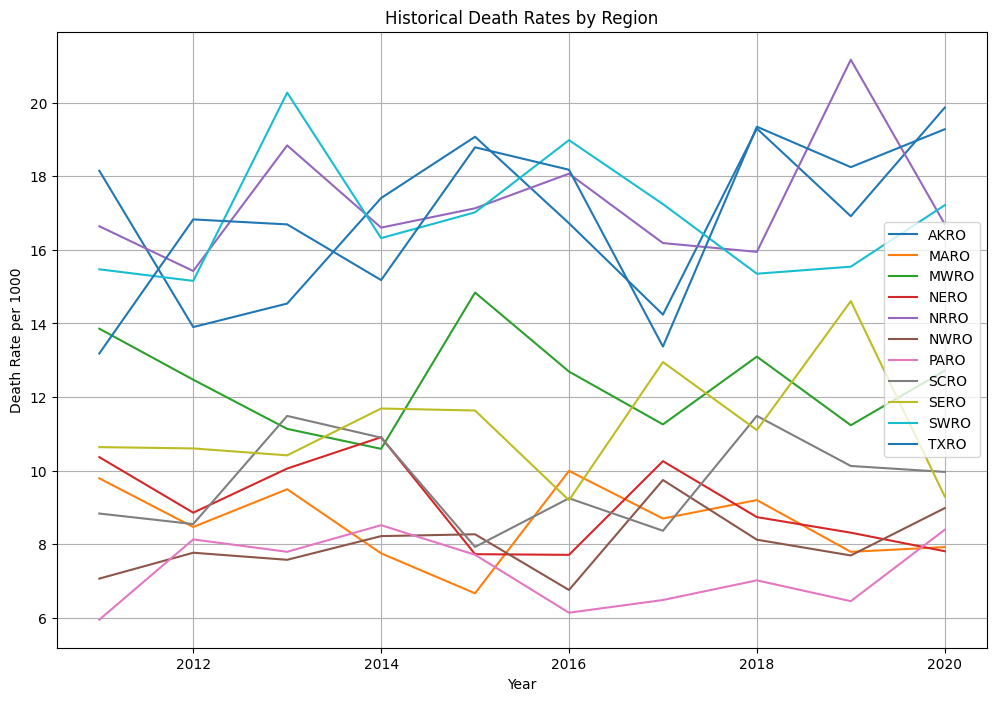

In [34]:
# Plotting historical death rates by region
plt.figure(figsize=(12, 8))
for region in regions:
    regional_data = data[data['region'] == region]
    plt.plot(regional_data['year'], regional_data['death_rate'], label=f'{region}')
plt.xlabel('Year')
plt.ylabel('Death Rate per 1000')
plt.title('Historical Death Rates by Region')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Regression analysis and future projections for each region
future_years = np.array([2021, 2022, 2023, 2024, 2025])
projections = pd.DataFrame(future_years, columns=['year'])

In [36]:
for region in regions:
    regional_data = data[data['region'] == region]
    X = sm.add_constant(regional_data['year'])  # adding a constant for the intercept
    model = sm.OLS(regional_data['death_rate'], X).fit()
    
    # Projecting future death rates
    X_future = sm.add_constant(future_years, has_constant='add')
    projections[region] = model.predict(X_future)

In [37]:
# Displaying the projections
print(projections.set_index('year'))

           AKRO      MARO       MWRO      NERO       NRRO      NWRO      PARO  \
year                                                                            
2021  18.628616  8.013854  12.081025  7.892965  18.135922  8.768861  7.213443   
2022  18.922368  7.911688  12.024972  7.678398  18.293015  8.905377  7.205618   
2023  19.216120  7.809522  11.968919  7.463831  18.450107  9.041893  7.197794   
2024  19.509871  7.707356  11.912866  7.249264  18.607200  9.178409  7.189969   
2025  19.803623  7.605189  11.856812  7.034697  18.764293  9.314925  7.182145   

           SCRO       SERO       SWRO       TXRO  
year                                              
2021  10.186073  11.903205  16.809566  19.312538  
2022  10.276776  12.028818  16.800650  19.749289  
2023  10.367479  12.154430  16.791734  20.186040  
2024  10.458182  12.280042  16.782818  20.622791  
2025  10.548885  12.405655  16.773902  21.059542  
